# Example 4.4: Training a DNN on Boston Housing data

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from sklearn import preprocessing

import numpy as np
import pylab as plt

import os
if not os.path.isdir('figures'):
    os.makedirs('figures')

## Set the parameters

In [2]:
no_epochs = 200
batch_size = 32

seed = 10
tf.random.set_seed(seed)

## Read input data and transform

In [3]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

scaler = preprocessing.StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

print(x_train.shape)
print(y_test.shape)

(404, 13)
(102,)


## Create the theee-layer DNN model

In [4]:
model = Sequential([
    Dense(10, activation='relu'),
    Dense(5, activation='relu'),
    Dense(1, activation='linear')
])

## Set arguments for learning

In [5]:
model.compile(optimizer='sgd',
              loss='mse')

## Train the model

In [6]:
history = model.fit(x_train, y_train, 
                    epochs=no_epochs, 
                    batch_size=batch_size, 
                    verbose = 2, 
                    use_multiprocessing=True,
                    validation_data=(x_test, y_test))

Epoch 1/200
13/13 - 1s - loss: 416.7836 - val_loss: 351.5735
Epoch 2/200
13/13 - 0s - loss: 372.3506 - val_loss: 287.6563
Epoch 3/200
13/13 - 0s - loss: 119.5969 - val_loss: 48.7919
Epoch 4/200
13/13 - 0s - loss: 32.0667 - val_loss: 448.9330
Epoch 5/200
13/13 - 0s - loss: 86.6640 - val_loss: 86.8392
Epoch 6/200
13/13 - 0s - loss: 24.4531 - val_loss: 37.1698
Epoch 7/200
13/13 - 0s - loss: 15.3576 - val_loss: 30.5579
Epoch 8/200
13/13 - 0s - loss: 14.4497 - val_loss: 23.5120
Epoch 9/200
13/13 - 0s - loss: 22.7998 - val_loss: 33.0555
Epoch 10/200
13/13 - 0s - loss: 12.1317 - val_loss: 26.9586
Epoch 11/200
13/13 - 0s - loss: 11.4821 - val_loss: 30.0133
Epoch 12/200
13/13 - 0s - loss: 15.9279 - val_loss: 24.7112
Epoch 13/200
13/13 - 0s - loss: 13.2341 - val_loss: 32.1649
Epoch 14/200
13/13 - 0s - loss: 11.0175 - val_loss: 25.4288
Epoch 15/200
13/13 - 0s - loss: 11.1757 - val_loss: 28.3339
Epoch 16/200
13/13 - 0s - loss: 13.1462 - val_loss: 28.5458
Epoch 17/200
13/13 - 0s - loss: 12.0119 - v

Epoch 139/200
13/13 - 0s - loss: 4.7521 - val_loss: 17.6619
Epoch 140/200
13/13 - 0s - loss: 5.7258 - val_loss: 15.5960
Epoch 141/200
13/13 - 0s - loss: 7.4931 - val_loss: 13.2001
Epoch 142/200
13/13 - 0s - loss: 5.9871 - val_loss: 14.6425
Epoch 143/200
13/13 - 0s - loss: 5.2338 - val_loss: 15.5847
Epoch 144/200
13/13 - 0s - loss: 5.0355 - val_loss: 15.5934
Epoch 145/200
13/13 - 0s - loss: 4.9859 - val_loss: 19.0160
Epoch 146/200
13/13 - 0s - loss: 5.6505 - val_loss: 14.2325
Epoch 147/200
13/13 - 0s - loss: 5.0588 - val_loss: 16.9569
Epoch 148/200
13/13 - 0s - loss: 5.1777 - val_loss: 15.5705
Epoch 149/200
13/13 - 0s - loss: 5.4414 - val_loss: 18.4178
Epoch 150/200
13/13 - 0s - loss: 6.2526 - val_loss: 13.0974
Epoch 151/200
13/13 - 0s - loss: 4.8187 - val_loss: 15.0608
Epoch 152/200
13/13 - 0s - loss: 4.3796 - val_loss: 15.5487
Epoch 153/200
13/13 - 0s - loss: 7.4271 - val_loss: 19.5829
Epoch 154/200
13/13 - 0s - loss: 7.0113 - val_loss: 12.4655
Epoch 155/200
13/13 - 0s - loss: 5.3826 

## Print final errors

In [7]:
print('train m.s.e. = %3.3f, test m.s.e. = %3.3f'%(history.history['loss'][-1], history.history['val_loss'][-1]))

train m.s.e. = 6.086, test m.s.e. = 15.171


## Plot learning curves

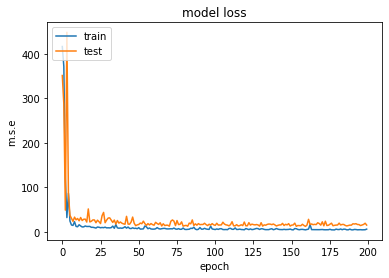

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('m.s.e')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('figures/4.4a_1.png')